In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import glob

# BERT

In [2]:
with open('run-metrics.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8285273909568787, 'full_set_var_values': [0.041195183992385864, 0.03737594187259674, 0.03241831436753273, 0.0279122032225132, 0.02042466029524803, 0.019073758274316788, 0.018287625163793564, 0.017793674021959305, 0.01691342331469059, 0.015728650614619255, 0.015252454206347466, 0.014074371196329594, 0.013477472588419914, 0.013031326234340668, 0.01260344311594963, 0.011925622820854187, 0.01183782797306776, 0.011456011794507504, 0.011322693899273872, 0.010873396880924702, 0.010707639157772064, 0.01049008872359991, 0.010153072886168957, 0.009762761183083057, 0.009514139965176582, 0.009414061903953552, 0.009113209322094917, 0.008941298350691795, 0.008719785138964653, 0.008637131191790104, 0.008390272036194801, 0.008241375908255577, 0.008110051043331623, 0.008007076568901539, 0.007913310080766678, 0.007732263766229153, 0.0076059442944824696, 0.007453422527760267, 0.007354367524385452, 0.007251568138599396, 0.007088539656251669, 0.006956500466912985

In [3]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']
subset_sizes = modelling_metrics['subset_size']

In [4]:
def get_key(filename):
    return filename.split('/')[2].split('-')[2].split('.')[0].lower()

In [5]:
file_list = glob.glob('./Eval-Results-bert-base-uncased/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed


In [6]:
results = {}

In [7]:
results['subset_size'] = subset_sizes
results['r2_value'] = variance_metrics['r2_values']
results['test_accuracy'] = modelling_metrics['test_accuracies']
results['test_loss'] = modelling_metrics['test_losses']

In [8]:
subset_sizes = modelling_metrics['subset_size']

for key, values in odd_results.items():
    values = json.loads(values)
    metrics = values['evaluation_metrics']
    losses = []
    accuracies = []
    for metric in metrics:
        loss = metric['eval_loss']
        acc = metric['eval_accuracy']
        losses.append(loss)
        accuracies.append(acc)

    results[f"{key}_loss"] = losses
    results[f"{key}_accuracy"] = accuracies

In [9]:
results_df = pd.DataFrame(results)
results_df

,subset_size,r2_value,test_accuracy,test_loss,imdb_loss,imdb_accuracy,sst2_loss,sst2_accuracy,yelp_loss,yelp_accuracy
0,2776,0.819424,0.748814,0.530179,0.556370,0.76436,0.607702,0.705148,0.533143,0.767263
1,5552,0.824859,0.753961,0.491525,0.502986,0.76592,0.539926,0.736121,0.439562,0.814158
2,8328,0.826377,0.738521,0.505057,0.536959,0.74156,0.589302,0.703737,0.473140,0.796816
3,11104,0.827293,0.767181,0.480362,0.501064,0.76848,0.690023,0.690523,0.484313,0.761105
4,13880,0.827823,0.774952,0.461300,0.506842,0.75984,0.541573,0.754918,0.451435,0.807211
5,16656,0.828073,0.766374,0.478801,0.500360,0.75084,0.545420,0.731785,0.446351,0.806658
6,19432,0.828513,0.768191,0.500919,0.498000,0.76864,0.588472,0.746217,0.489513,0.775395
7,22208,0.828446,0.760420,0.485510,0.504272,0.75032,0.502660,0.775171,0.412235,0.825974
8,24984,0.828664,0.766778,0.468755,0.545509,0.71236,0.481013,0.785550,0.428340,0.816026
9,27760,0.828785,0.764154,0.483793,0.518682,0.74616,0.639523,0.700797,0.484255,0.772737


In [10]:
results_df['mean_odd_accuracy'] = results_df[['imdb_accuracy', 'sst2_accuracy', 'yelp_accuracy']].mean(axis=1)
results_df['mean_odd_loss'] = results_df[['imdb_loss', 'sst2_loss', 'yelp_loss']].mean(axis=1)
results_df

,subset_size,r2_value,test_accuracy,test_loss,imdb_loss,imdb_accuracy,sst2_loss,sst2_accuracy,yelp_loss,yelp_accuracy,mean_odd_accuracy,mean_odd_loss
0,2776,0.819424,0.748814,0.530179,0.556370,0.76436,0.607702,0.705148,0.533143,0.767263,0.745590,0.565739
1,5552,0.824859,0.753961,0.491525,0.502986,0.76592,0.539926,0.736121,0.439562,0.814158,0.772066,0.494158
2,8328,0.826377,0.738521,0.505057,0.536959,0.74156,0.589302,0.703737,0.473140,0.796816,0.747371,0.533134
3,11104,0.827293,0.767181,0.480362,0.501064,0.76848,0.690023,0.690523,0.484313,0.761105,0.740036,0.558467
4,13880,0.827823,0.774952,0.461300,0.506842,0.75984,0.541573,0.754918,0.451435,0.807211,0.773990,0.499950
5,16656,0.828073,0.766374,0.478801,0.500360,0.75084,0.545420,0.731785,0.446351,0.806658,0.763094,0.497377
6,19432,0.828513,0.768191,0.500919,0.498000,0.76864,0.588472,0.746217,0.489513,0.775395,0.763417,0.525328
7,22208,0.828446,0.760420,0.485510,0.504272,0.75032,0.502660,0.775171,0.412235,0.825974,0.783822,0.473056
8,24984,0.828664,0.766778,0.468755,0.545509,0.71236,0.481013,0.785550,0.428340,0.816026,0.771312,0.484954
9,27760,0.828785,0.764154,0.483793,0.518682,0.74616,0.639523,0.700797,0.484255,0.772737,0.739898,0.547487


[(0.7, 0.8)]

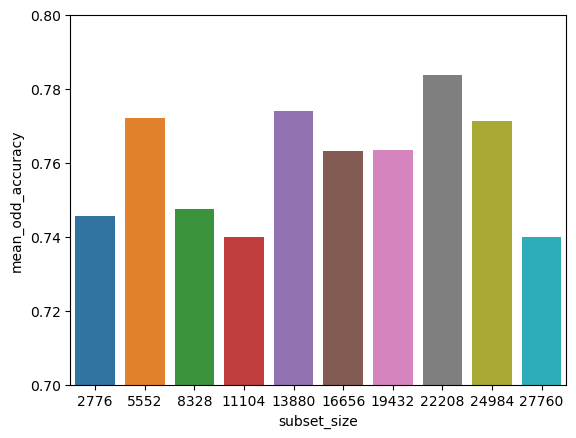

In [11]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'])
plot.set(ylim=(0.7, 0.8))

[(0.4, 0.6)]

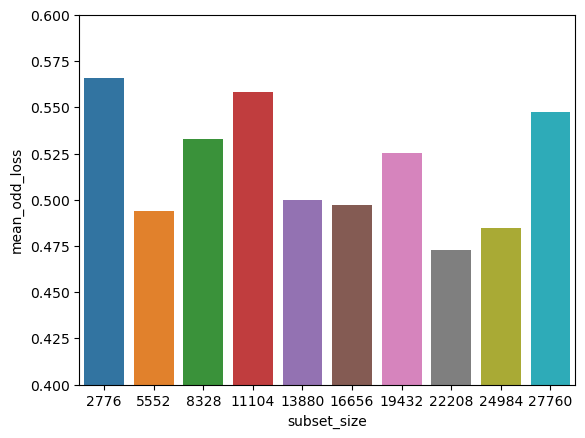

In [12]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'])
plot.set(ylim=(0.4, 0.6))

[(0.4, 0.8)]

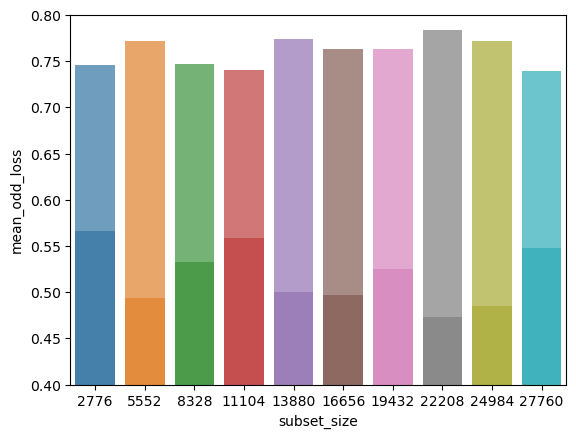

In [13]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7)
plot.set(ylim=(0.4, 0.8))

[(0.4, 0.8)]

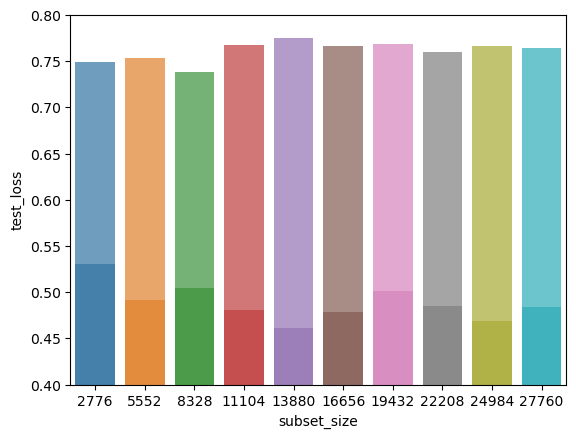

In [14]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7)
plot.set(ylim=(0.4, 0.8))

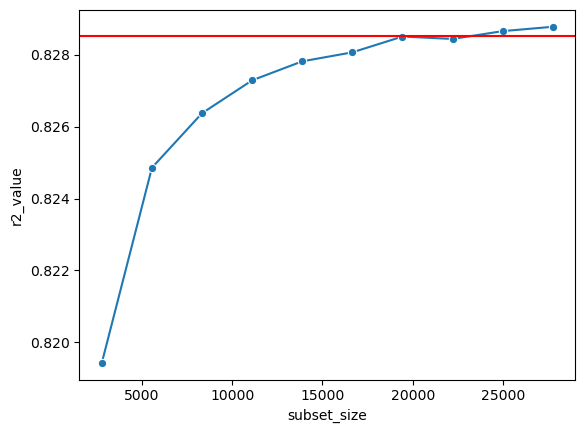

In [15]:
graph = sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')

<Axes: xlabel='subset_size', ylabel='imdb_accuracy'>

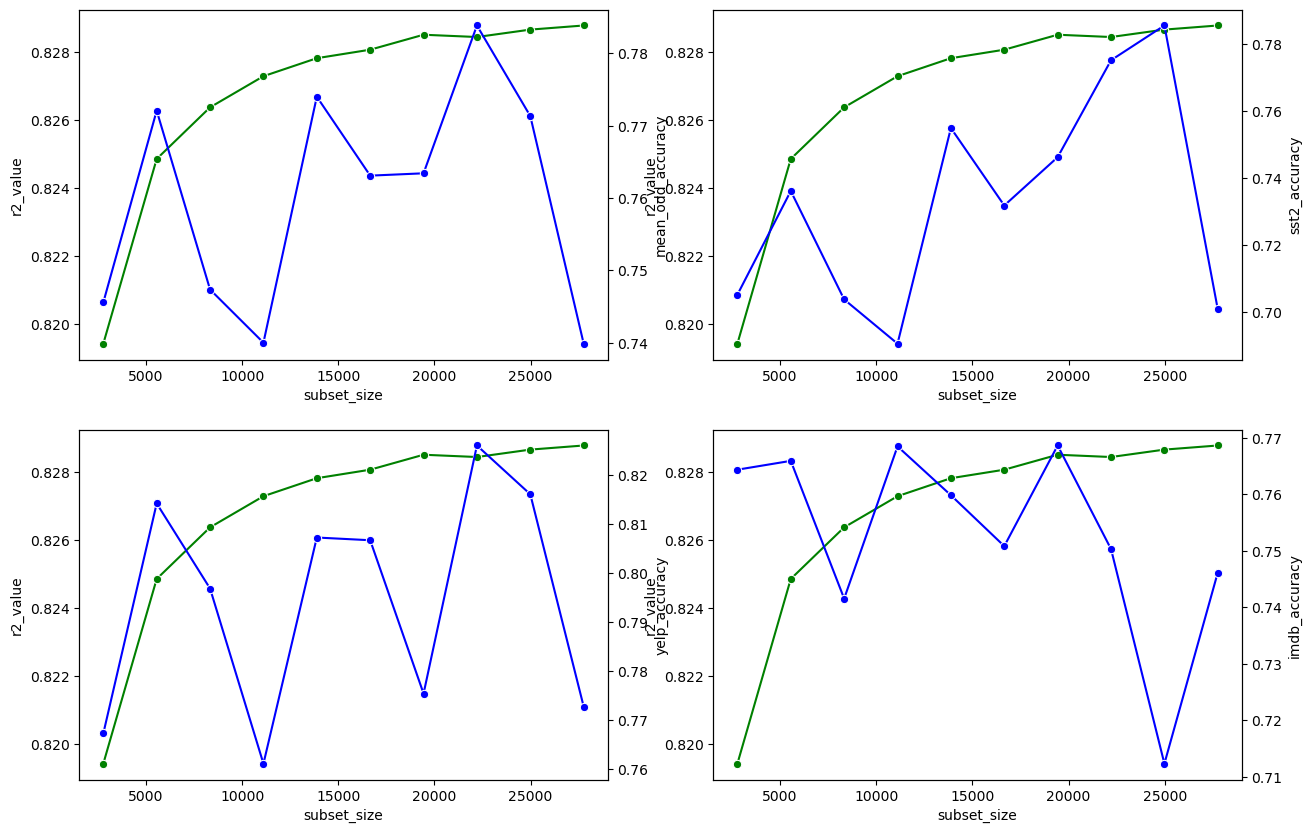

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][0], marker="o")
ax1 = axes[0][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], color="b", ax=ax1, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[0][1], marker="o")
ax2 = axes[0][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['sst2_accuracy'], color="b", ax=ax2, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][0], marker="o")
ax3 = axes[1][0].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['yelp_accuracy'], color="b", ax=ax3, marker="o")

sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], color="g", ax=axes[1][1], marker="o")
ax4 = axes[1][1].twinx()
sns.lineplot(x=results_df['subset_size'], y=results_df['imdb_accuracy'], color="b", ax=ax4, marker="o")

(0.4, 1.0)

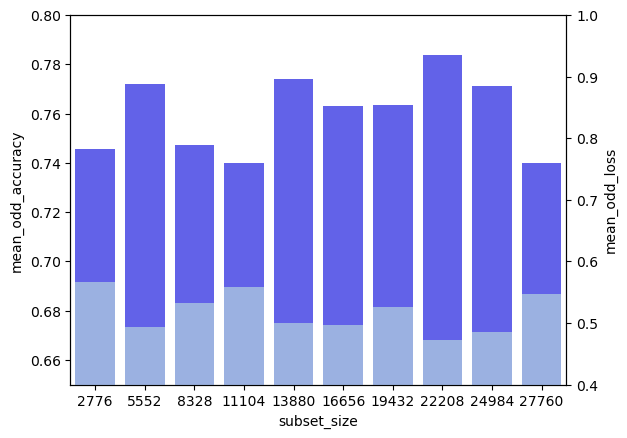

In [17]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.65, 0.8)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.4, 1.0)

(0.4, 0.9)

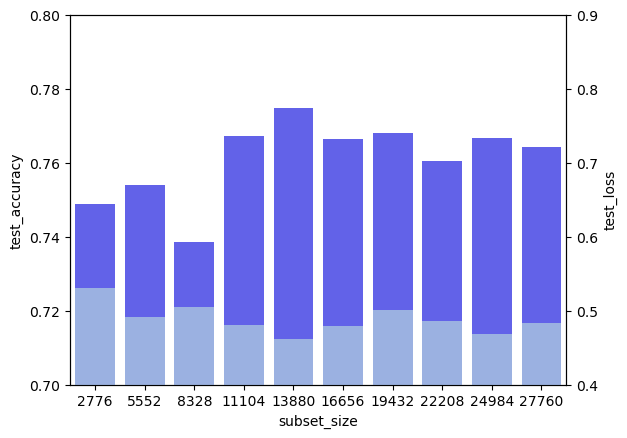

In [25]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.7, 0.8)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.4, 0.9)

In [26]:
results_df.to_csv('../analysis_results/tweet_eval_bert.csv', index=False)